In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
driver = webdriver.Chrome()
driver.get('https://stacks.cdc.gov/view/cdc/124397')
#Waiting for the page to load:
time.sleep(1)

#Locate the download button by its ID:
download_button = driver.find_element(By.ID, 'download-document-submit')

#Click the button to initiate the download:
download_button.click()

#Wait for 2 seconds to allow the download:
time.sleep(2)


driver.quit()

In [8]:
DF_cdc= pd.read_excel('df_cdc.xlsx')
DF_cdc

,State,No. Children with ASD in 2018,Denominator,"ASD prevalence per 1,000 in 2018",No. Children with ASD in 2020,Denominator.1,"ASD prevalence per 1,000 in 2020",Percent change
0,Arizona,331,13313,24.9,360,13118,27.4,10.0
1,Arkansas,353,15435,22.9,362,15432,23.5,2.6
2,California,586,15076,38.9,710,15828,44.9,15.4
3,Georgia,514,23580,21.8,553,21921,25.2,15.6
4,Maryland,423,20666,20.5,491,21278,23.1,12.7
5,Minessota,277,10081,27.5,482,16150,29.8,8.4
6,Missouri,405,24481,16.5,601,24561,24.5,48.5
7,New Jersey,491,17289,28.4,544,18940,28.7,1.1
8,Tennesse,573,25237,22.7,713,25588,27.9,22.9
9,Utah,548,25459,21.5,621,247434,25.1,16.7


In [9]:
cdc_data= DF_cdc.loc[:, ['State','No. Children with ASD in 2020','ASD prevalence per 1,000 in 2020']]
cdc_data

,State,No. Children with ASD in 2020,"ASD prevalence per 1,000 in 2020"
0,Arizona,360,27.4
1,Arkansas,362,23.5
2,California,710,44.9
3,Georgia,553,25.2
4,Maryland,491,23.1
5,Minessota,482,29.8
6,Missouri,601,24.5
7,New Jersey,544,28.7
8,Tennesse,713,27.9
9,Utah,621,25.1


In [10]:
cdc_data_sorted = cdc_data.sort_values(by='No. Children with ASD in 2020', ascending=False)
cdc_data_sorted

,State,No. Children with ASD in 2020,"ASD prevalence per 1,000 in 2020"
8,Tennesse,713,27.9
2,California,710,44.9
9,Utah,621,25.1
6,Missouri,601,24.5
3,Georgia,553,25.2
7,New Jersey,544,28.7
4,Maryland,491,23.1
5,Minessota,482,29.8
1,Arkansas,362,23.5
0,Arizona,360,27.4


In [11]:
top_3_states_2020 = cdc_data_sorted.head(3)
print(top_3_states_2020.to_string(index=False))

     State  No. Children with ASD in 2020  ASD prevalence per 1,000 in 2020
  Tennesse                            713                              27.9
California                            710                              44.9
      Utah                            621                              25.1


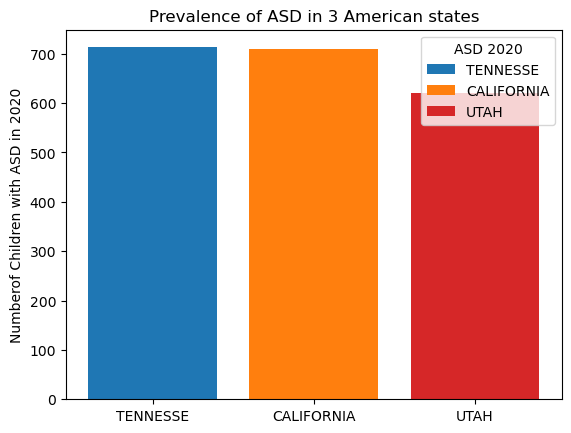

In [12]:
fig, ax = plt.subplots()

states = ['TENNESSE', 'CALIFORNIA', 'UTAH']
prevalence = [713, 710, 621]
bar_labels = 'TENNESSE', 'CALIFORNIA', 'UTAH'
bar_colors = ['tab:blue', 'tab:orange', 'tab:red']

ax.bar(states, prevalence, label=bar_labels, color=bar_colors)

ax.set_ylabel('Numberof Children with ASD in 2020')
ax.set_title('Prevalence of ASD in 3 American states')
ax.legend(title='ASD 2020')

plt.savefig('cdc-asd-2020.png')

plt.show()


In [ ]:
top_3_states_2020.to_excel('cdc_asd_2020.xlsx')

In [ ]:
top_3_states_2020.to_csv('cdc_asd_2020.csv')